### 1. Virtual environment preparation

Running the below lines in terminal

In [11]:
#python -m venv venv
#venv\Scripts\Activate

### 2. Scrap data from website using BeautifulSoup

#### load libraries

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### Send a GET request to the page

In [13]:
response = requests.get("https://www.exchange-rates.org/exchange-rate-history/usd-idr")

#### Parse the HTML content using BeautifulSoup

In [6]:
soup = BeautifulSoup(response.content, 'html.parser')

                   Date          US Dollar to Indonesian Rupiah
0    2024-9-2\n2024-9-2  1 USD = 15,554 IDR\n1 USD = 15,554 IDR
1  2024-8-30\n2024-8-30  1 USD = 15,532 IDR\n1 USD = 15,532 IDR
2  2024-8-29\n2024-8-29  1 USD = 15,466 IDR\n1 USD = 15,466 IDR
3  2024-8-28\n2024-8-28  1 USD = 15,446 IDR\n1 USD = 15,446 IDR
4  2024-8-27\n2024-8-27  1 USD = 15,481 IDR\n1 USD = 15,481 IDR


#### Use the CSS selector tag to find the table below

In [17]:
table = soup.select_one('body > div.layout.locale_en-US > div.content.container > div > div > section.box.history-rates-table-box > div > table')

#### Extract the headers (Date, Rate)

In [18]:
headers = [header.text.strip() for header in table.find_all('th')]

#### Extract the rows of the table

In [20]:
rows = table.find_all('tr')

#### Extract data for each row

In [21]:
data = []
for row in rows[1:]: 
    cells = row.find_all('td')
    if len(cells) > 1:  
        date = cells[0].text.strip()
        rate = cells[1].text.strip()
        data.append([date, rate])

### 3. Creating a DataFrame

In [23]:
df = pd.DataFrame(data, columns=headers)
df

Date          US Dollar to Indonesian Rupiah
0      2024-9-2\n2024-9-2  1 USD = 15,554 IDR\n1 USD = 15,554 IDR
1    2024-8-30\n2024-8-30  1 USD = 15,532 IDR\n1 USD = 15,532 IDR
2    2024-8-29\n2024-8-29  1 USD = 15,466 IDR\n1 USD = 15,466 IDR
3    2024-8-28\n2024-8-28  1 USD = 15,446 IDR\n1 USD = 15,446 IDR
4    2024-8-27\n2024-8-27  1 USD = 15,481 IDR\n1 USD = 15,481 IDR
..                    ...                                     ...
124  2024-3-12\n2024-3-12  1 USD = 15,560 IDR\n1 USD = 15,560 IDR
125  2024-3-11\n2024-3-11  1 USD = 15,525 IDR\n1 USD = 15,525 IDR
126    2024-3-8\n2024-3-8  1 USD = 15,541 IDR\n1 USD = 15,541 IDR
127    2024-3-7\n2024-3-7  1 USD = 15,627 IDR\n1 USD = 15,627 IDR
128    2024-3-6\n2024-3-6  1 USD = 15,660 IDR\n1 USD = 15,660 IDR

[129 rows x 2 columns]

### 4. Data preprocessing

#### Data cleaning

In [25]:
df['Date'] = df['Date'].apply(lambda x: x.split('\n')[0])
df['Date'] = pd.to_datetime(df['Date'])
df['Value'] = df['US Dollar to Indonesian Rupiah'].apply(lambda x: x.split(' ')[3].replace(',', ''))
df['Value'] = pd.to_numeric(df['Value'])

Date          US Dollar to Indonesian Rupiah
0   2024-09-02  1 USD = 15,554 IDR\n1 USD = 15,554 IDR
1   2024-08-30  1 USD = 15,532 IDR\n1 USD = 15,532 IDR
2   2024-08-29  1 USD = 15,466 IDR\n1 USD = 15,466 IDR
3   2024-08-28  1 USD = 15,446 IDR\n1 USD = 15,446 IDR
4   2024-08-27  1 USD = 15,481 IDR\n1 USD = 15,481 IDR
..         ...                                     ...
124 2024-03-12  1 USD = 15,560 IDR\n1 USD = 15,560 IDR
125 2024-03-11  1 USD = 15,525 IDR\n1 USD = 15,525 IDR
126 2024-03-08  1 USD = 15,541 IDR\n1 USD = 15,541 IDR
127 2024-03-07  1 USD = 15,627 IDR\n1 USD = 15,627 IDR
128 2024-03-06  1 USD = 15,660 IDR\n1 USD = 15,660 IDR

[129 rows x 2 columns]

#### Data Wrangling

In [28]:
df = df[['Date', 'Value']]
df = df.sort_values(by='Date', ascending=True).reset_index(drop=True)
df

Date  Value
0   2024-03-06  15660
1   2024-03-07  15627
2   2024-03-08  15541
3   2024-03-11  15525
4   2024-03-12  15560
..         ...    ...
124 2024-08-27  15481
125 2024-08-28  15446
126 2024-08-29  15466
127 2024-08-30  15532
128 2024-09-02  15554

[129 rows x 2 columns]

In [34]:
df.to_csv("USD to IDR Exchange Rate Over Time.csv")

### 5. Data visualization

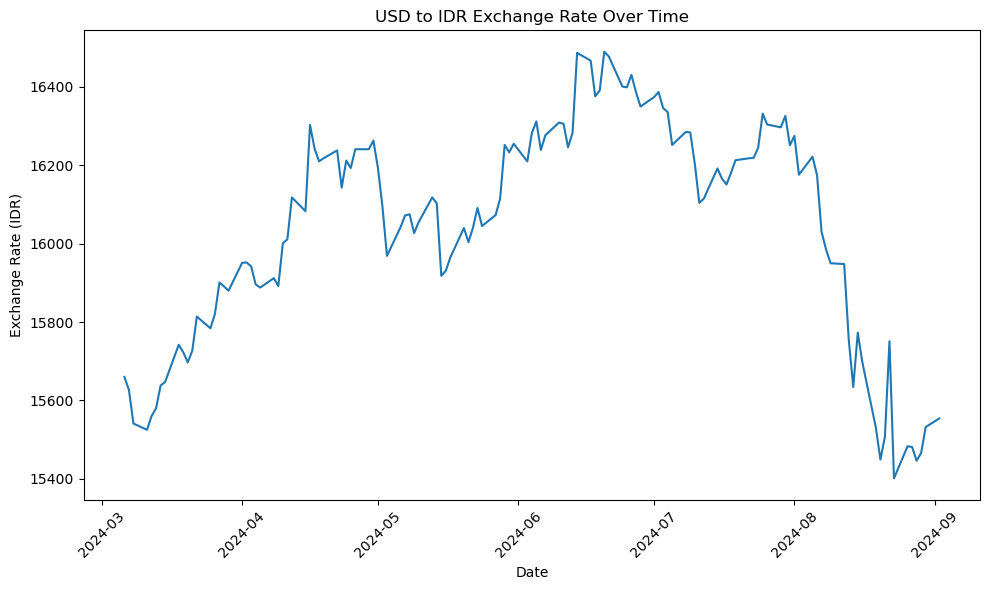

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Value', data=df)
plt.title('USD to IDR Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\seraj\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
